# Data Analysis 

# Importing the Data 


In [0]:
import pandas as pd
import numpy as np
pd.set_option("display.precision", 4)  #upto 4 decimal places in all outputs

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('bmh')

In [0]:
df = pd.read_csv('train.csv', sep= ',')
#df=df.replace(np.nan, '',regex=True)

In [0]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341424 entries, 0 to 341423
Data columns (total 24 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   reservation_id                      341424 non-null  object 
 1   booking_date                        341424 non-null  object 
 2   checkin_date                        341424 non-null  object 
 3   checkout_date                       341424 non-null  object 
 4   channel_code                        341424 non-null  int64  
 5   main_product_code                   341424 non-null  int64  
 6   numberofadults                      341424 non-null  int64  
 7   numberofchildren                    341424 non-null  int64  
 8   persontravellingid                  341424 non-null  int64  
 9   resort_region_code                  341424 non-null  int64  
 10  resort_type_code                    341424 non-null  int64  
 11  room_type_booked_code     

In [0]:
#Change dtype of any columns specially object/categorical variables sometimes taken wrongly by default (update the list for cols_to_object accordingly)
cols_to_object = [ 'channel_code',
               'main_product_code',
               'persontravellingid',
               'resort_region_code',
               'resort_type_code',
               'room_type_booked_code',
               'season_holidayed_code',
               'state_code_residence',
               'state_code_resort',
               'booking_type_code',
               'cluster_code',
               'reservationstatusid_code',
               'resort_id',
               ]
for col in cols_to_object:
  df[col] = df[col].astype('object')

In [0]:
#Define the ID columns and label(dependent variable) columns if exists, these variable are utilized in some of the subsequent analysis
#Define key column like MID/Cust_ID if exists 

id = ['memberid', 'resort_id', 'reservation_id']
label= 'amount_spent_per_room_night_scaled'
key  = 'reservation_id'


In [0]:
#We can add or remove percentile values can give us basic idea of the distribution in numerical columns
df.loc[:, df.columns.difference(id)].describe(percentiles =[.1,.25,.5,.75,.9,.95])

,amount_spent_per_room_night_scaled,numberofadults,numberofchildren,roomnights,total_pax
count,341424.0000,341424.0000,341424.0000,341424.0000,341424.0000
mean,7.7208,3.2754,0.3627,3.7383,3.1934
std,1.0901,1.7561,0.7580,2.4791,1.1678
min,1.6004,0.0000,0.0000,-45.0000,0.0000
10%,6.3371,2.0000,0.0000,2.0000,2.0000
25%,7.1873,2.0000,0.0000,2.0000,2.0000
50%,7.8608,3.0000,0.0000,3.0000,3.0000
75%,8.4191,4.0000,0.0000,4.0000,4.0000
90%,8.9204,5.0000,2.0000,6.0000,4.0000
95%,9.2456,6.0000,2.0000,8.0000,5.0000


In [0]:
#Seperate describe for categorical columns.
df.loc[:, df.columns.difference(id)].describe(include= ['bool', 'object'])

,booking_date,booking_type_code,channel_code,checkin_date,checkout_date,cluster_code,main_product_code,member_age_buckets,persontravellingid,reservationstatusid_code,resort_region_code,resort_type_code,room_type_booked_code,season_holidayed_code,state_code_residence,state_code_resort
count,341424,341424,341424,341424,341424,341424,341424,341424,341424,341424,341424,341424,341424,341310.0,336660.0,341424
unique,1621,2,3,1532,1531,6,5,10,6,4,3,7,6,4.0,37.0,11
top,02/09/16,1,1,08/10/16,21/10/18,F,2,D,45,A,1,1,3,2.0,8.0,1
freq,1353,299016,161225,460,491,120623,177615,67618,267307,312481,143790,154324,137439,126771.0,134919.0,59830


In [0]:
# df.count() does not include NaN values. We can usually drop colums with less then 10 percent fill rate
fill = 0.1
df2 = df[[column for column in df if df[column].count() / len(df) >=fill]]
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2.loc[:, df2.columns.difference(id)]

List of dropped columns: 



In [0]:
print(list(set(df.dtypes.tolist())))
df_num = df.select_dtypes(include = ['float64', 'int64']) #including only numerical data types for histograms
df_num.head()

[dtype('int64'), dtype('float64'), dtype('O')]


,amount_spent_per_room_night_scaled,numberofadults,numberofchildren,roomnights,total_pax
0,7.7064,2,0,1,3
1,6.6626,2,0,5,2
2,7.8716,2,0,4,2
3,5.3449,2,2,5,2
4,7.0593,2,0,5,2


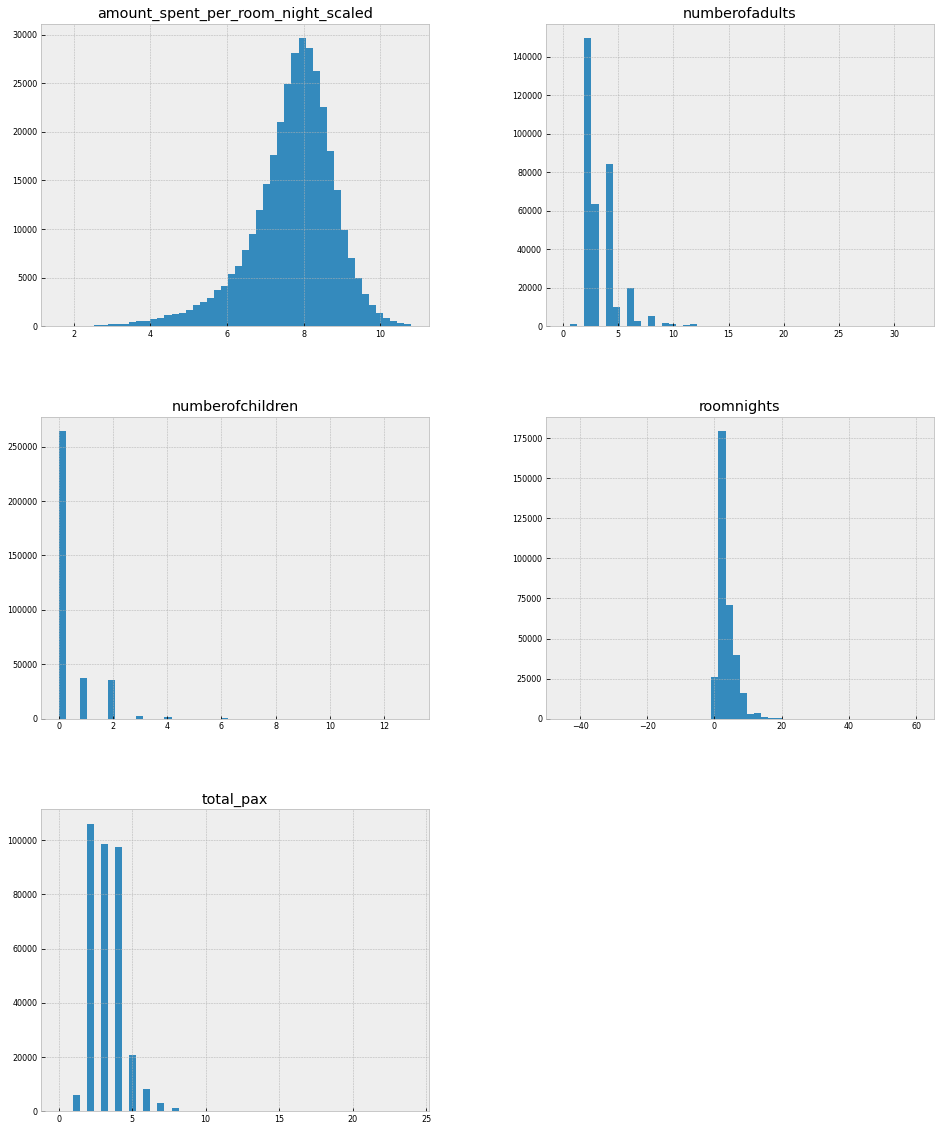

In [0]:
#To plot histograms for all numerical columns also dont remove ";" it is to ignore matplotlib verbose
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8  );


# Correlation 
If label is passed it we aim to calculate the correlation between different numerical variables

In [0]:
df_num_corr = df_num.corr()[label]
golden_features_list = df_num_corr[abs(df_num_corr) > 0].sort_values(ascending=False)  ##Set correlation thresold in case required by default 0
print("These are {} strongly correlated numerical variables with {}:\n{}".format(len(golden_features_list),label,golden_features_list))

These are 5 strongly correlated numerical variables with amount_spent_per_room_night_scaled:
amount_spent_per_room_night_scaled    1.0000
numberofadults                        0.1500
total_pax                             0.1431
roomnights                            0.0504
numberofchildren                      0.0478
Name: amount_spent_per_room_night_scaled, dtype: float64


# Distribution of label wrt to the independent numerical variables we have in aur dataframe


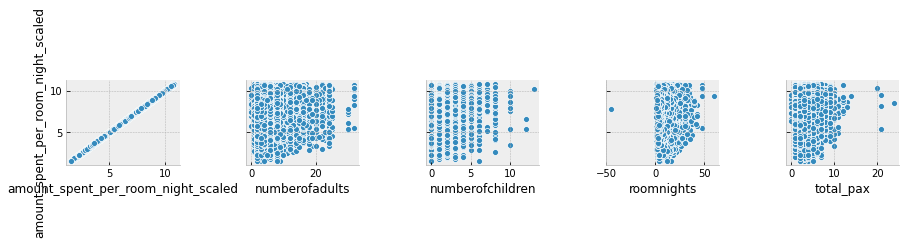

In [0]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=[label])

In [0]:
df_num.columns

Index(['amount_spent_per_room_night_scaled', 'numberofadults',
       'numberofchildren', 'roomnights', 'total_pax'],
      dtype='object')

# Optional corrrelation calculation 
Calculating correlation after removing those records which are 0 for numerical variables,  as it may indicate the absence of such feature in the data.

In [0]:
import operator

individual_features_df = []
for i in range(0, len(df_num.columns)): 
    if df_num.columns[i] == label:
      print('Skipped Label - Label correlation')
    else:
      tmpDf = df_num[[df_num.columns[i], label]]
      tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
      individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()[label][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))

print("These are {} strongly correlated numerical variables with {}".format(len(golden_features_list)-1,label))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

Skipped Label - Label correlation
These are 4 strongly correlated numerical variables with amount_spent_per_room_night_scaled
numberofchildren: 0.04123821367735483
     roomnights: 0.05037576725320267
      total_pax: 0.14314968371793546
 numberofadults: 0.15010367547015332


# Feature to feature relationship

Exploring how independent variables are related to each other


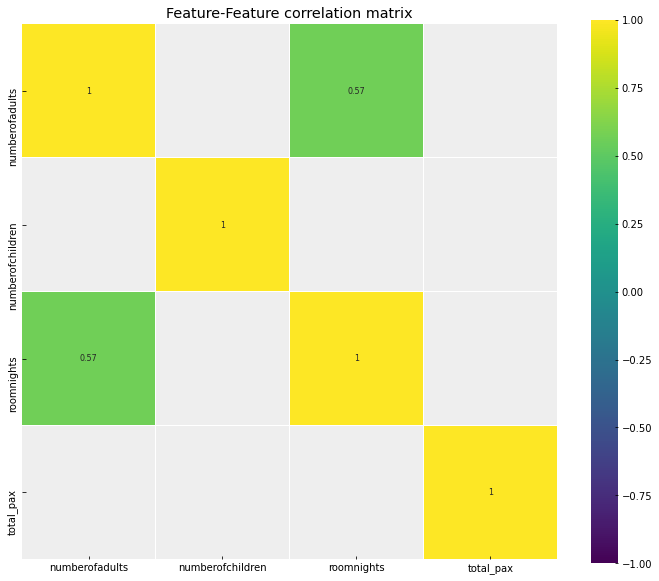

In [0]:
corr = df_num.drop(label, axis=1).corr() # We already examined label correlations
plt.figure(figsize=(12, 10))
ax = plt.axes()
ax.set_title('Feature-Feature correlation matrix')
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

# Numeric-Numeric feature analysis


In [0]:
quantitative_features_list = df_num.columns.difference(['amount_spent_per_room_night_scaled'])
df_quantitative_values = df[quantitative_features_list]
df_quantitative_values.head()

,numberofadults,numberofchildren,roomnights,total_pax
0,2,0,1,3
1,2,0,5,2
2,2,0,4,2
3,2,2,5,2
4,2,0,5,2


In [0]:
features_to_analyse = [x for x in quantitative_features_list if x in golden_features_list]
features_to_analyse.append(label)
features_to_analyse

['numberofadults',
 'numberofchildren',
 'roomnights',
 'total_pax',
 'amount_spent_per_room_night_scaled']

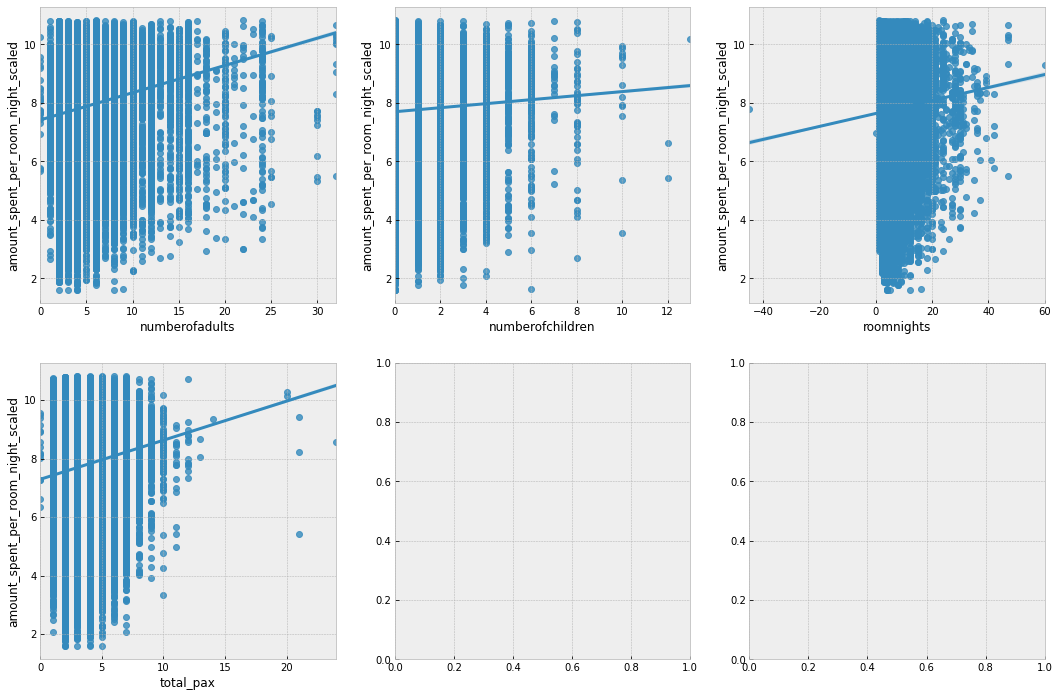

In [0]:
#plotting regplot for analysing linear relationship between the label and variable

fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y=label, data=df[features_to_analyse], ax=ax)

# Categorical Variable analysis 
Following section comprises some relevant analysis for categorical variables with dependent variable.

In [0]:
# We want to keep the label
categorical_features = df.columns.difference(quantitative_features_list)
df_categ = df[categorical_features]
df_categ.head()

,amount_spent_per_room_night_scaled,booking_date,booking_type_code,channel_code,checkin_date,checkout_date,cluster_code,main_product_code,member_age_buckets,persontravellingid,reservationstatusid_code,resort_region_code,resort_type_code,room_type_booked_code,season_holidayed_code,state_code_residence,state_code_resort
0,7.7064,05/04/18,1,3,05/04/18,06/04/18,F,1,F,46,C,3,3,3,2,7,3
1,6.6626,23/01/15,1,1,11/04/15,16/04/15,F,1,F,46,A,3,3,4,2,7,5
2,7.8716,28/01/15,1,1,01/02/15,05/02/15,E,1,F,47,A,1,5,4,2,7,1
3,5.3449,02/05/15,1,1,11/06/15,16/06/15,D,1,F,46,A,2,2,3,2,7,2
4,7.0593,02/09/15,1,1,14/12/15,19/12/15,D,1,F,46,A,2,2,4,2,7,2


In [0]:
df_not_num = df_categ.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 16 non numerical features including:
['booking_date', 'booking_type_code', 'channel_code', 'checkin_date', 'checkout_date', 'cluster_code', 'main_product_code', 'member_age_buckets', 'persontravellingid', 'reservationstatusid_code', 'resort_region_code', 'resort_type_code', 'room_type_booked_code', 'season_holidayed_code', 'state_code_residence', 'state_code_resort']


#Box-Plot 
Box pot for specific categorical variable with dependent variable to understand how the density plot of label for categorical variables and identifying presence of outliers  

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

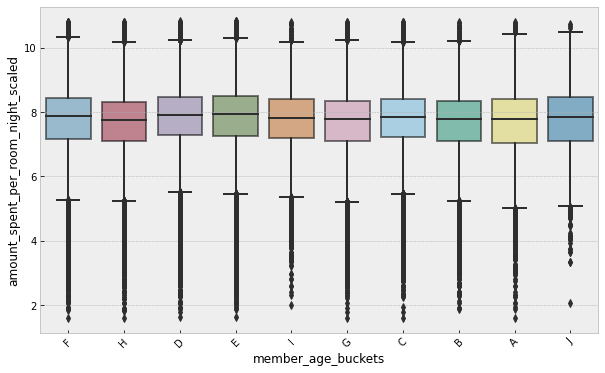

In [0]:
categorical_var = 'member_age_buckets'      # Change the variable which is required to be analysed
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x= categorical_var, y=label, data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

# Count for different classes for each categorical variable in the data



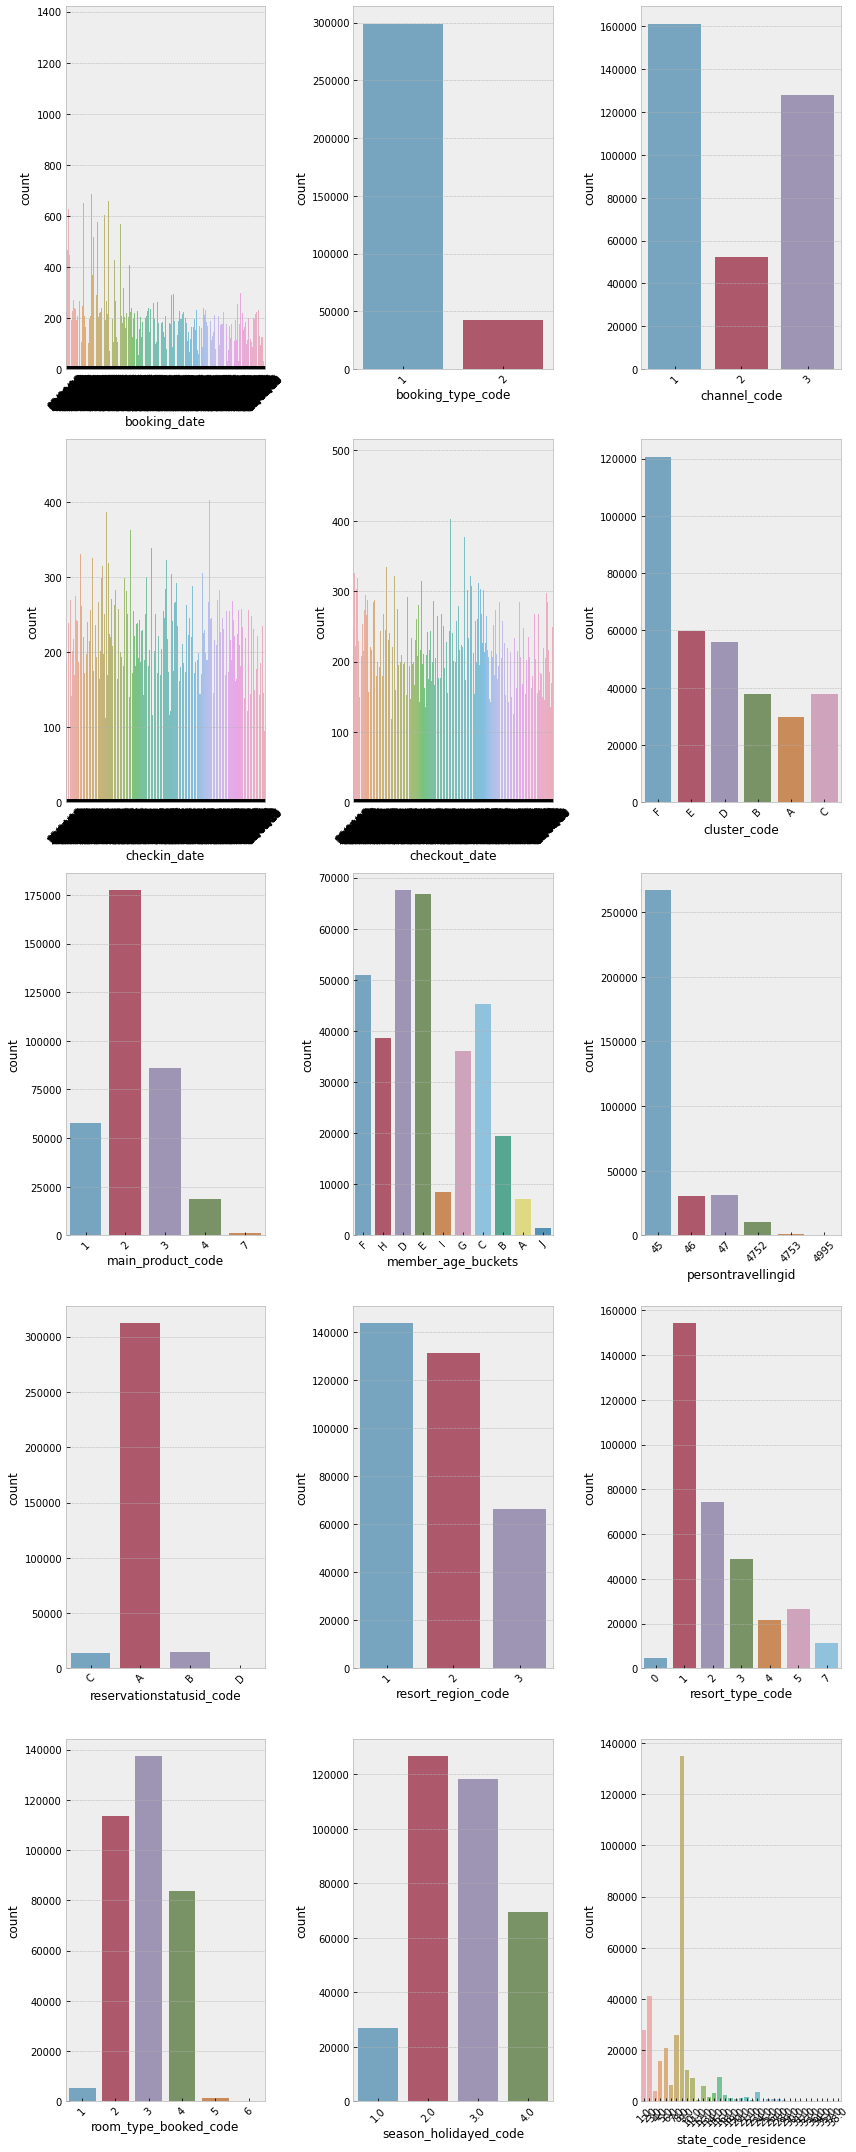

In [0]:
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()